In [3]:
import os

import numpy as np
import matplotlib.pyplot as plt
import tqdm
from torchvision.utils import make_grid
import torch as th
from matplotlib.patches import Rectangle


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import MinMaxScaler

In [4]:
data = np.load("experiments/cluster_cars/visualization.npy", allow_pickle=True).item()
feat = data["feat"]
feat = MinMaxScaler().fit_transform(feat)
cars = data["cars"]
tsne = data["tsne"]

In [5]:
clusters = [i for i in range(2, 21)]
db_score = []
sse_score = []
for cluster in tqdm.tqdm(clusters, desc="Cluster"):
    clf = KMeans(cluster).fit(feat)
    labels = clf.predict(feat)
    db_score.append(davies_bouldin_score(feat, labels))
    #clf = GaussianMixture(cluster).fit(tsne)
    #labels = clf.predict(tsne)
    #db_score.append(davies_bouldin_score(tsne, labels))

Cluster: 100%|██████████| 19/19 [00:40<00:00,  2.14s/it]


Text(0.5, 0, '# of Clusters')

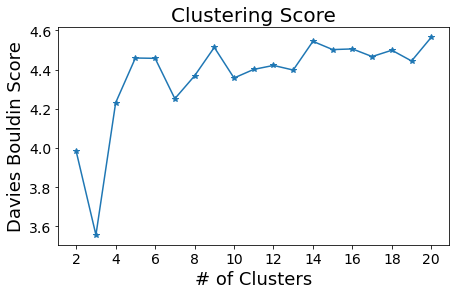

In [6]:
plt.figure(figsize=(7, 4))
plt.plot(clusters, db_score, marker="*")
plt.title("Clustering Score", fontsize=20)
plt.xticks([clusters[i] for i in range(0, len(clusters)+1, 2)], fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("Davies Bouldin Score", fontsize=18)
plt.xlabel("# of Clusters", fontsize=18)

In [101]:
n_clusters = clusters[np.argmin(db_score)]
clf = KMeans(n_clusters).fit(feat)
labels = clf.predict(feat)

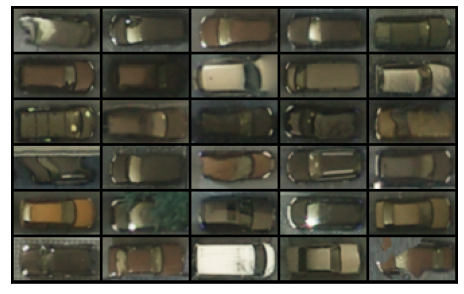

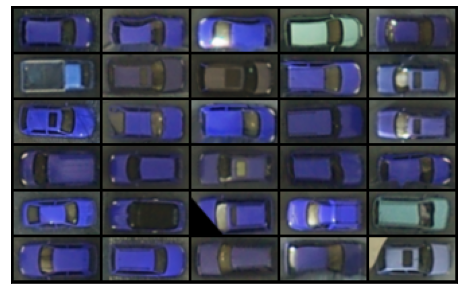

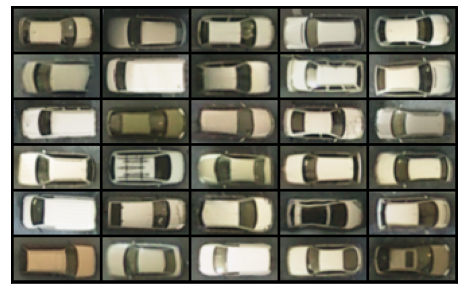

In [137]:
# plot cars 10 per each one

n_cars = 30
colors = plt.rcParams['axes.prop_cycle'].by_key()['color'][:n_clusters]

for i in range(n_clusters):
    imgs = cars[labels == i]

    idx = np.random.choice(len(imgs), n_cars, replace=False)
    img = th.tensor(imgs[idx].transpose(0, 3, 1, 2))
    grid = make_grid(img, nrow=5, padding=2)
    img = grid.numpy().transpose(1, 2, 0)
    rec = Rectangle((0,0),img.shape[1], img.shape[0],linewidth=8,edgecolor=colors[i], facecolor='none')
    
    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    #plt.gca().add_patch(rec)
    #plt.gca().tick_params(direction='out', length=6, width=2, colors='r',
    #           grid_color='r', grid_alpha=1)
    plt.xticks([])
    plt.yticks([])

Text(0.5, 1.0, 'TSNE Visualization')

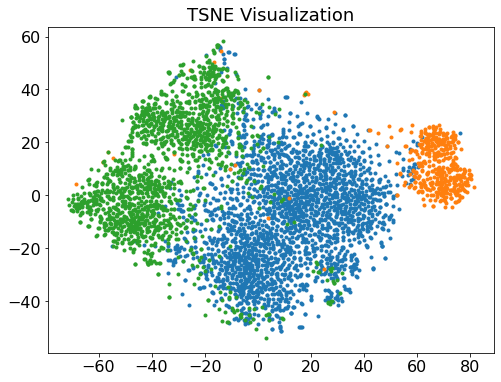

In [121]:
plt.figure(figsize=(8, 6))
for i in range(n_clusters):
    plt.plot(tsne[labels == i, 0],
             tsne[labels == i, 1], ".", color=colors[i])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title("TSNE Visualization", fontsize=18)


In [115]:
np.unique(labels, return_counts=True)

(array([0, 1, 2], dtype=int32), array([2601,  457, 1658]))

In [ ]:
# resample cars